In [1]:
from mosaic_schedulers.schedulers.tv_milp import MOSAICSolver
from mosaic_schedulers.schedulers.ti_milp import MOSAICTISolver
from mosaic_schedulers.schedulers.ti_milp_heft import Scheduler as MOSAICTIHEFTSolver

from mosaic_schedulers.common.plotting import MOSAICplotter
import matplotlib.pyplot as plt
import json

import static_demo

%matplotlib notebook

# Create a problem instance

Create a sample input to the problem by choosing a demo type among:
- "selfish": all agents work in isolation
- "node_assist": nodes can help each other
- "base_station_assist": nodes have access to a powerful base station for computation but can't assist other nodes
- "assembly_line": underemployed nodes act both as relays and as computational assists

In [2]:
demo_input = static_demo.demo_input(demo_type="assembly_line", network_size='large',time_horizon=30)

JSONinput, TaskColors = static_demo.create_json_description(demo_input)

# Cutoff on the MILP solver time
time_limit = 120

For additional control on the problem inputs, you may want to call the function
`create_problem_input`
with parameters
- `science_nodes_number`: the number of agents in a science zone
- `assist_nodes_number`: the number of agents *not* in a science zone
- `inter_puffer_bw`: the bandwidth between agents
- `base_station_bw`: the bandwidth to-from a base station
- `assembly_chain_bw_hop1`: the bandwidth between selected nodes in a science zone and their counterparts _not_ in a science zone
- `assembly_chain_bw_hop2`: the bandwidth between selected nodes not in a science zone and the base station
- `time_horizon`: the time horizon of the optimization
- `agent`: what agent is calling the solver (useful if the problem is partitioned)

For instance,

`static_demo.demo_input(demo_type="assembly_line", network_size='large',time_horizon=30)`

internally calls

`create_problem_input(science_nodes_number=4, assist_nodes_number=4, inter_puffer_bw=0.01, base_station_bw=0.01, assembly_chain_bw_hop1=5.5, assembly_chain_bw_hop2=0.5, time_horizon=30, agent='puffer1',):
`

# Solve with a time-varying MILP solver

<IPython.core.display.Javascript object>


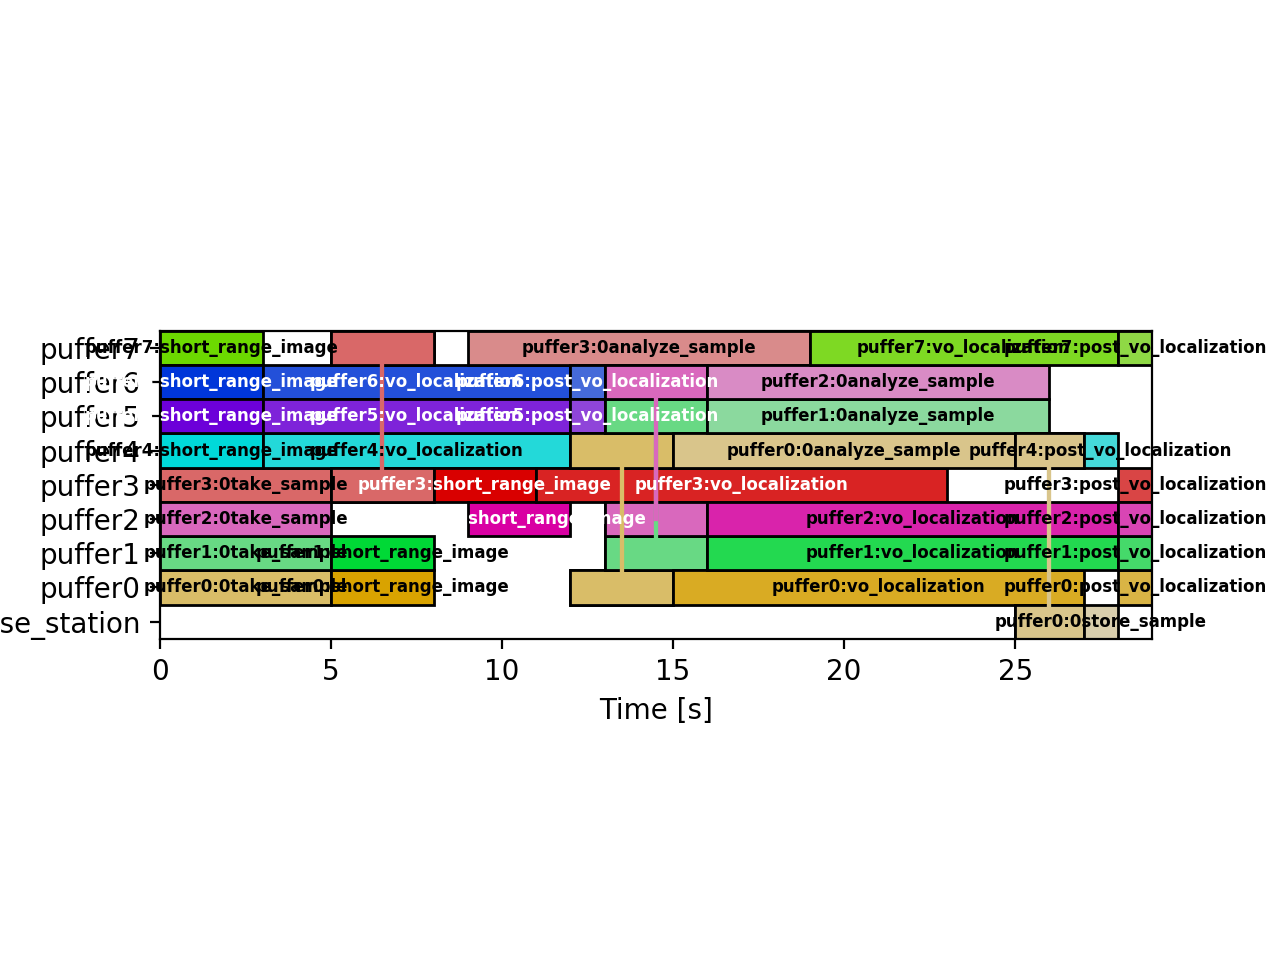

<IPython.core.display.Javascript object>


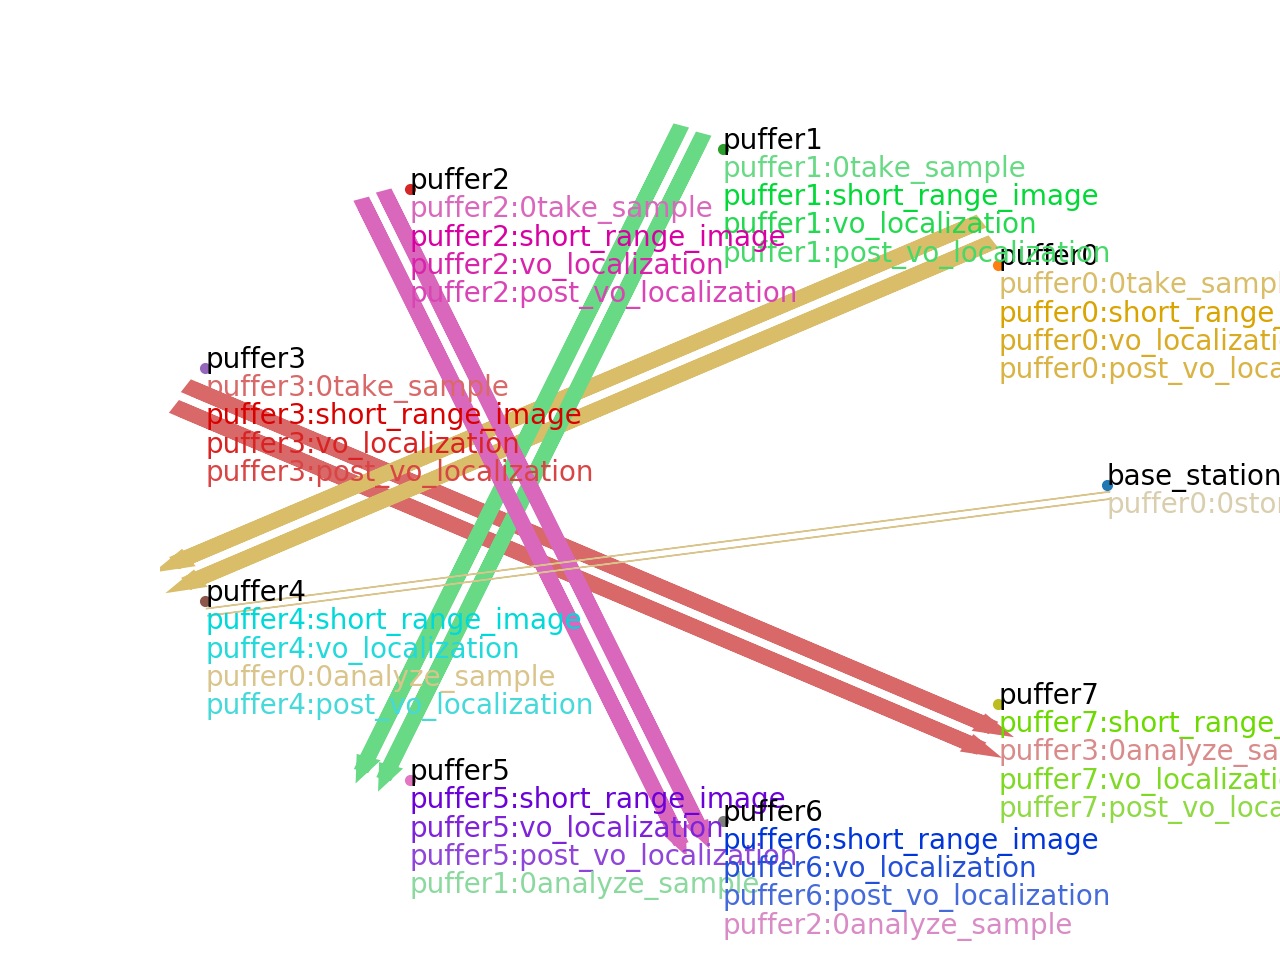

Samples:
 - Taken: 4/4
 - Analyzed: 4/4
 - Stored: 1/4


In [4]:
# Test with a TV solver
Scheduler = MOSAICSolver.JSONSolver(JSONinput, TimeLimit=time_limit)
Schedule = Scheduler.schedule()

# print("TV SCHEDULE:\n", Schedule)
if Schedule is not None:
    MOSAICplotter.SchedulePlotter(Schedule,TaskColors)
    MOSAICplotter.TaskAllocationPlotter(Schedule,TaskColors=TaskColors)
    evaluation = static_demo.evaluate_output(JSONinput, Schedule,verbose=True)
else:
    print("Problem infeasible!")



# Allocate tasks with a "time-invariant" solver

<IPython.core.display.Javascript object>


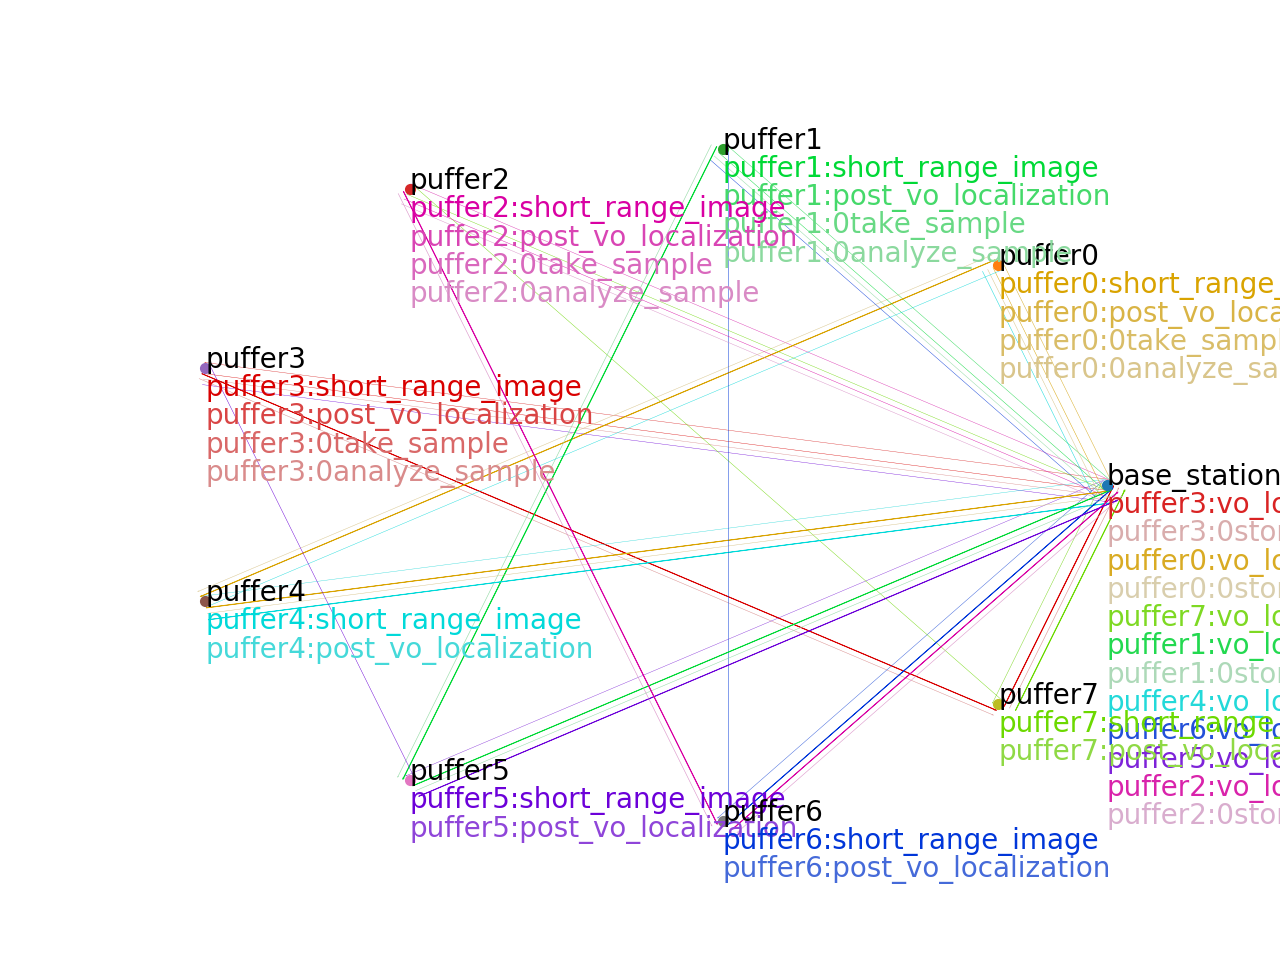

<IPython.core.display.Javascript object>


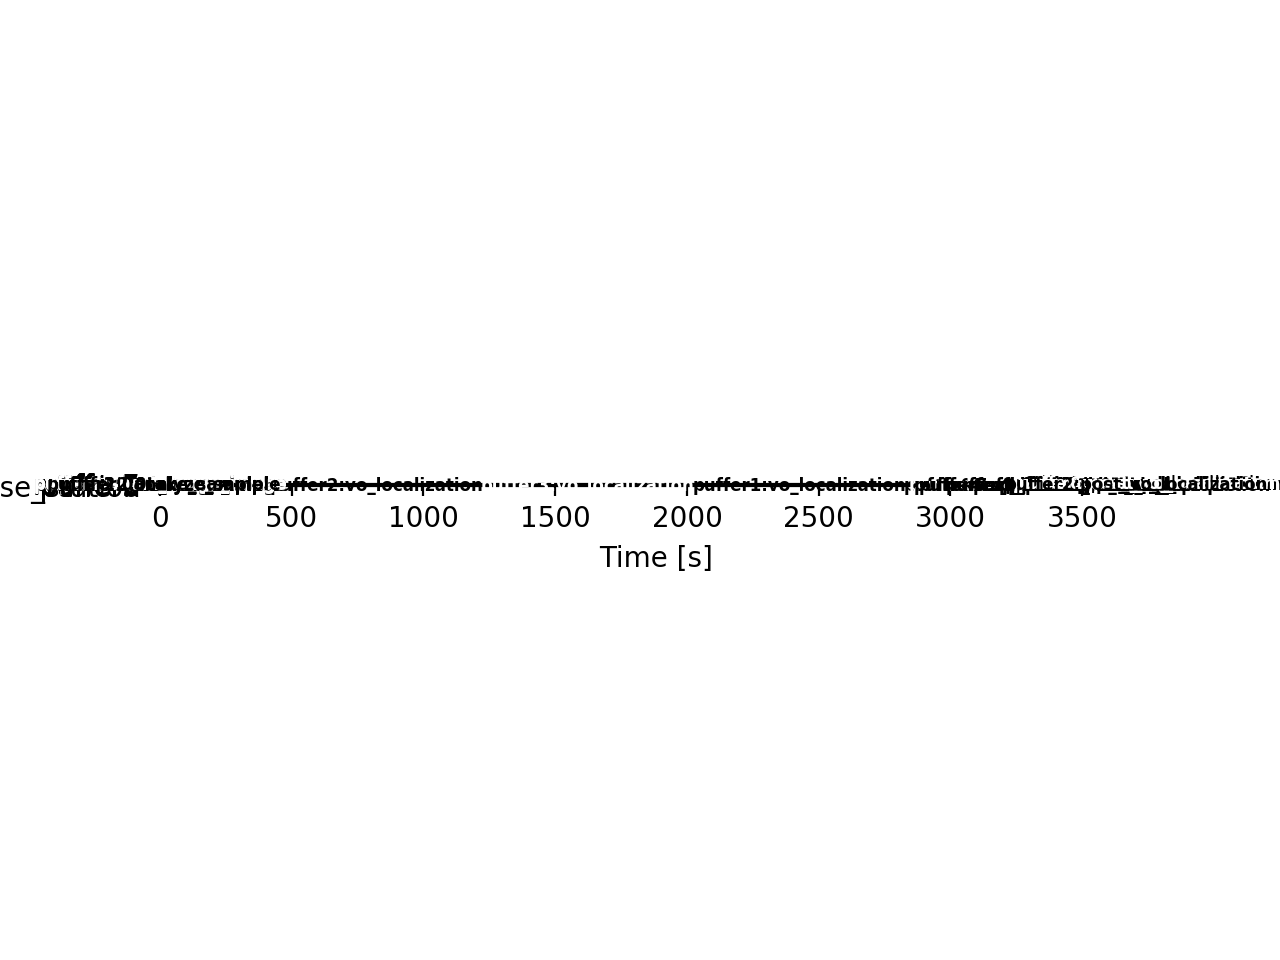

<IPython.core.display.Javascript object>


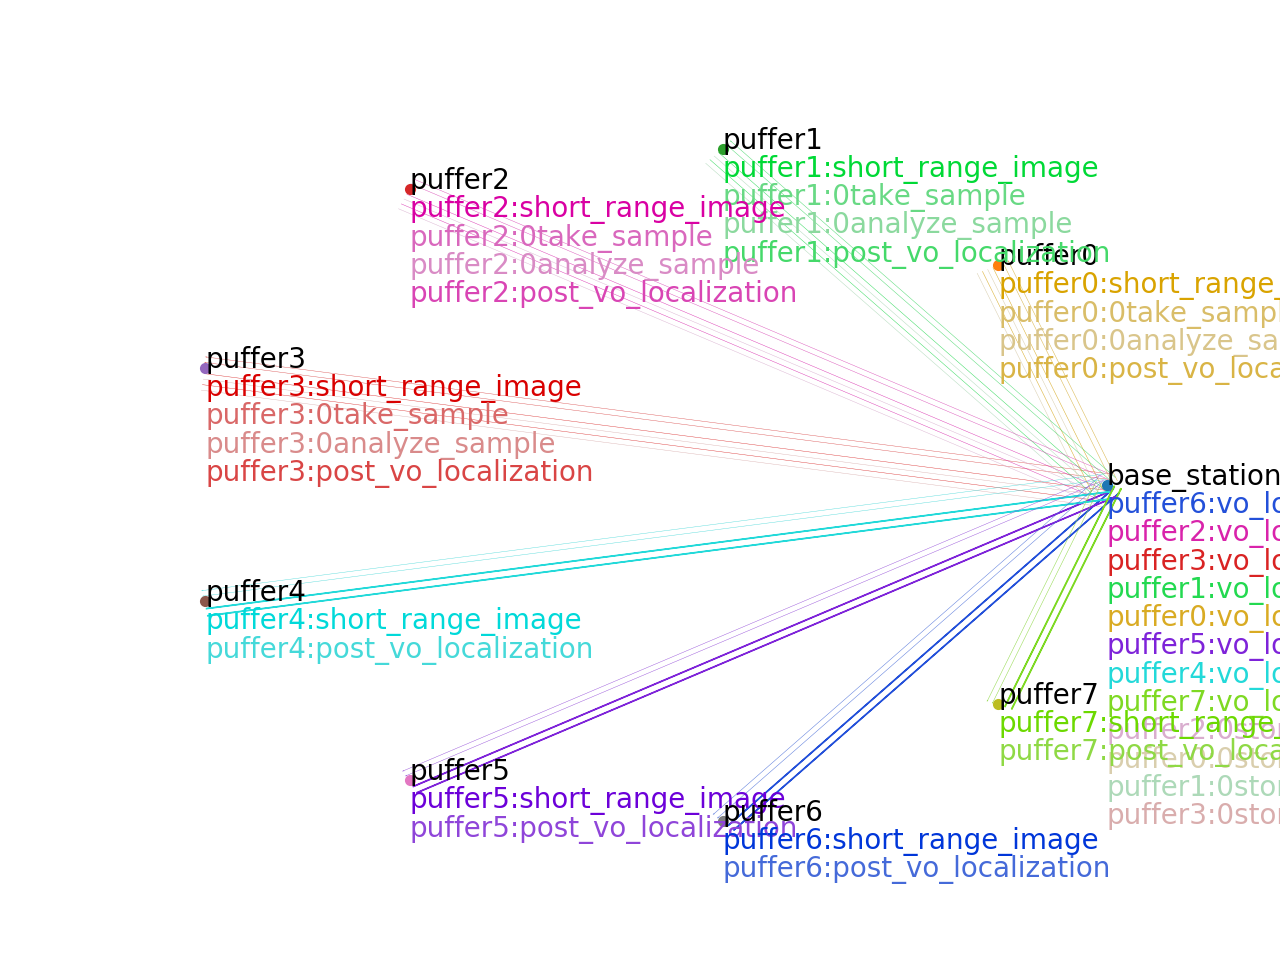

Samples:
 - Taken: 4/4
 - Analyzed: 4/4
 - Stored: 4/4


In [5]:
# # Test with a TI solver
TIScheduler = MOSAICTISolver.JSONSolver(JSONinput,solver='CPLEX',TimeLimit=60)
TISchedule = TIScheduler.schedule()
# print("TI SCHEDULE:\n", TISchedule)
if TISchedule is not None:
    MOSAICplotter.TaskAllocationPlotter(TISchedule,TaskColors=TaskColors)
    plt.show()
    
# Test with TI-HEFT

TIHScheduler = MOSAICTIHEFTSolver(JSONinput,solver='CPLEX',TimeLimit=time_limit)
TIHSchedule = TIHScheduler.schedule()
#print("TI HEFT SCHEDULE:\n", TIHSchedule)

if TIHSchedule is not None:
    MOSAICplotter.SchedulePlotter(TIHSchedule,TaskColors)
    MOSAICplotter.TaskAllocationPlotter(TIHSchedule,TaskColors=TaskColors)
    plt.show()
    _ = static_demo.evaluate_output(JSONinput, TIHSchedule,verbose=True)
else:
    print("Problem infeasible!")

# Selfish agents

<IPython.core.display.Javascript object>


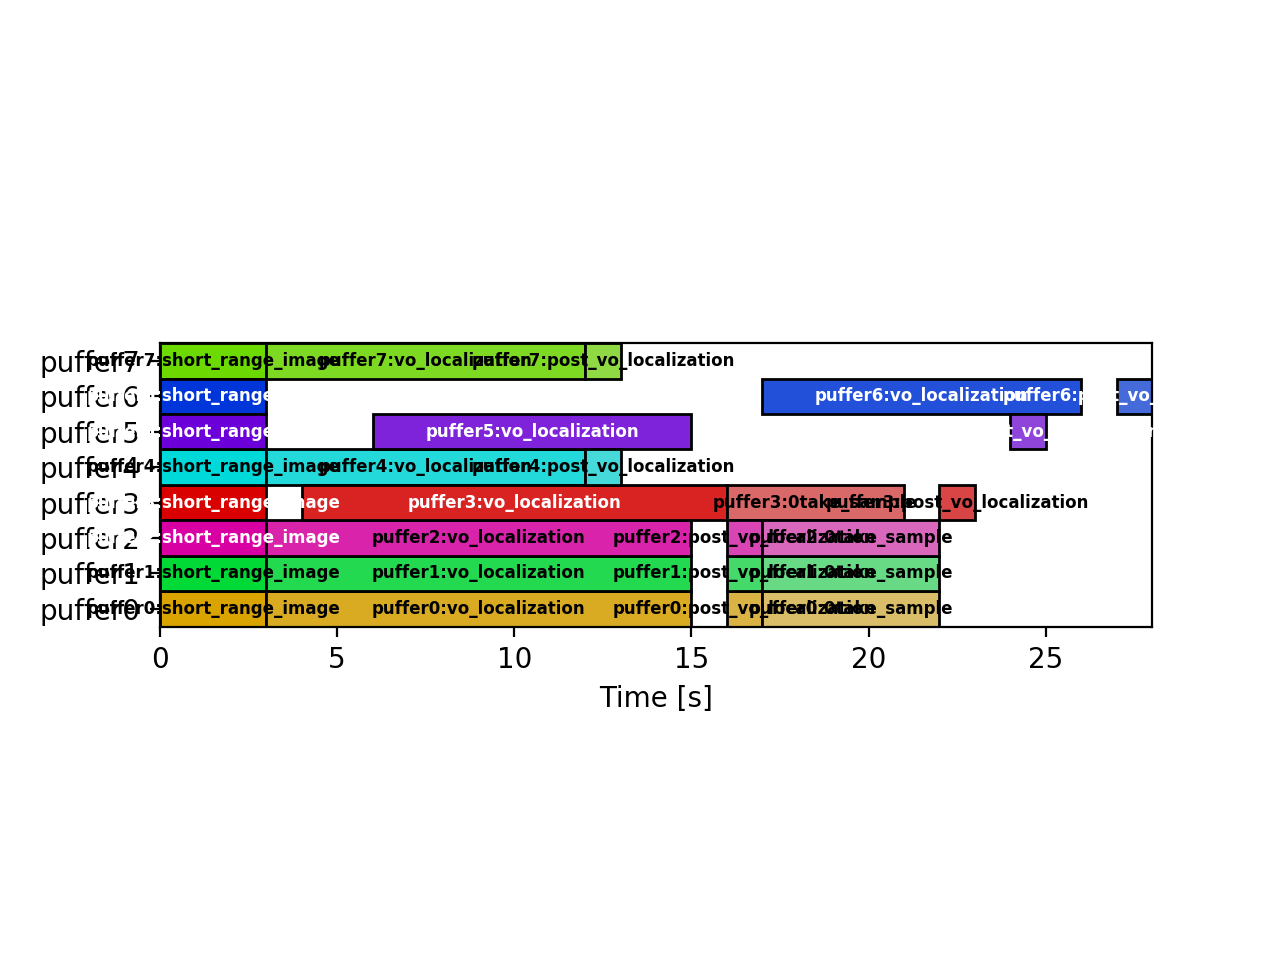

<IPython.core.display.Javascript object>


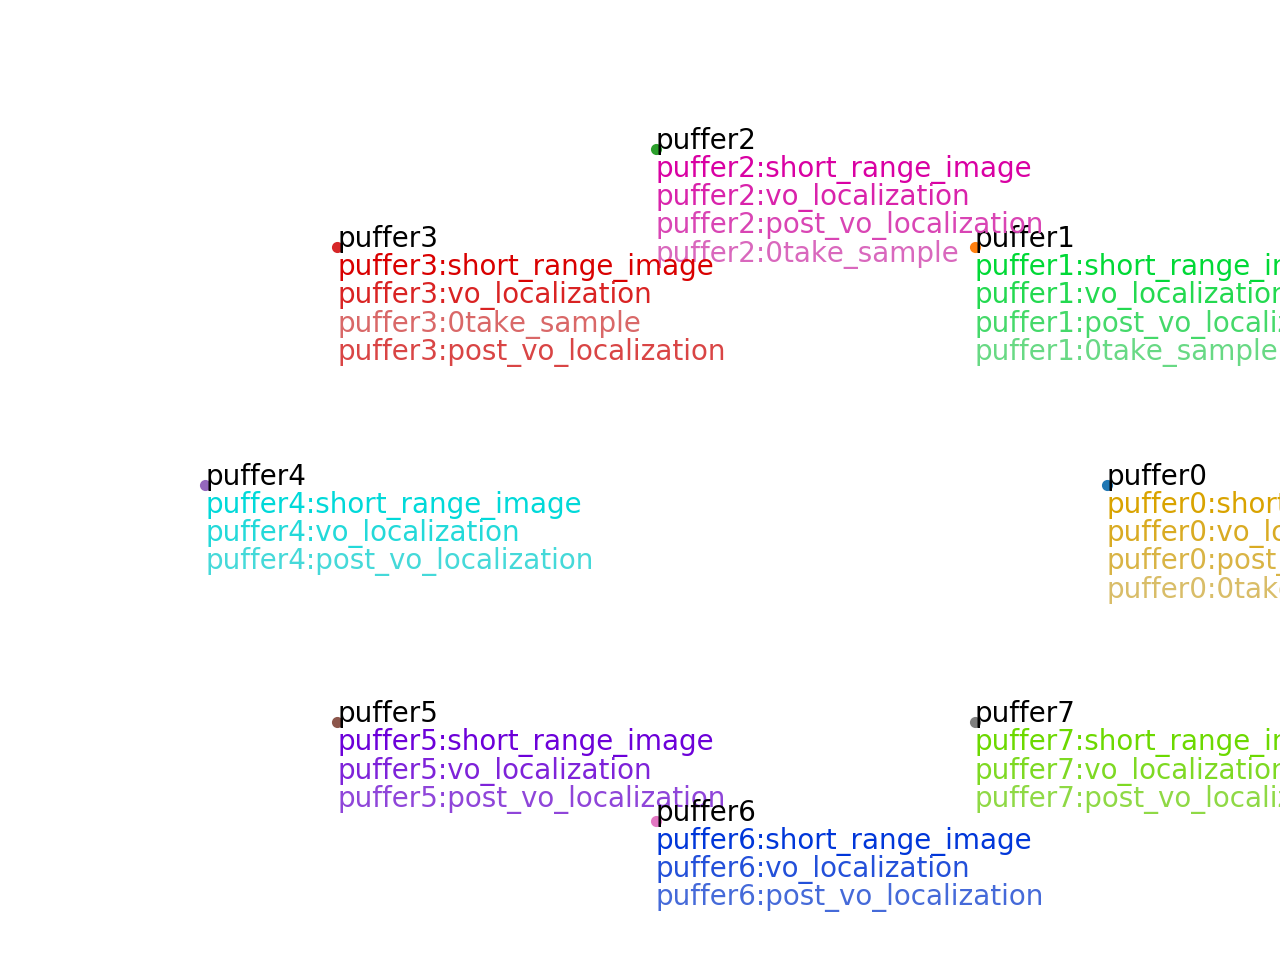

Samples:
 - Taken: 4/4
 - Analyzed: 0/4
 - Stored: 0/4


In [6]:
demo_input = static_demo.demo_input(demo_type="selfish", network_size='large',time_horizon=30)
JSONinput, TaskColors = static_demo.create_json_description(demo_input)
# Test with a TV solver
Scheduler = MOSAICSolver.JSONSolver(JSONinput, TimeLimit=time_limit)
Schedule = Scheduler.schedule()

# print("TV SCHEDULE:\n", Schedule)
if Schedule is not None:
    MOSAICplotter.SchedulePlotter(Schedule,TaskColors)
    MOSAICplotter.TaskAllocationPlotter(Schedule,TaskColors=TaskColors)
    _ = static_demo.evaluate_output(JSONinput, Schedule,verbose=True)
else:
    print("Problem infeasible!")


# Node Assist

<IPython.core.display.Javascript object>


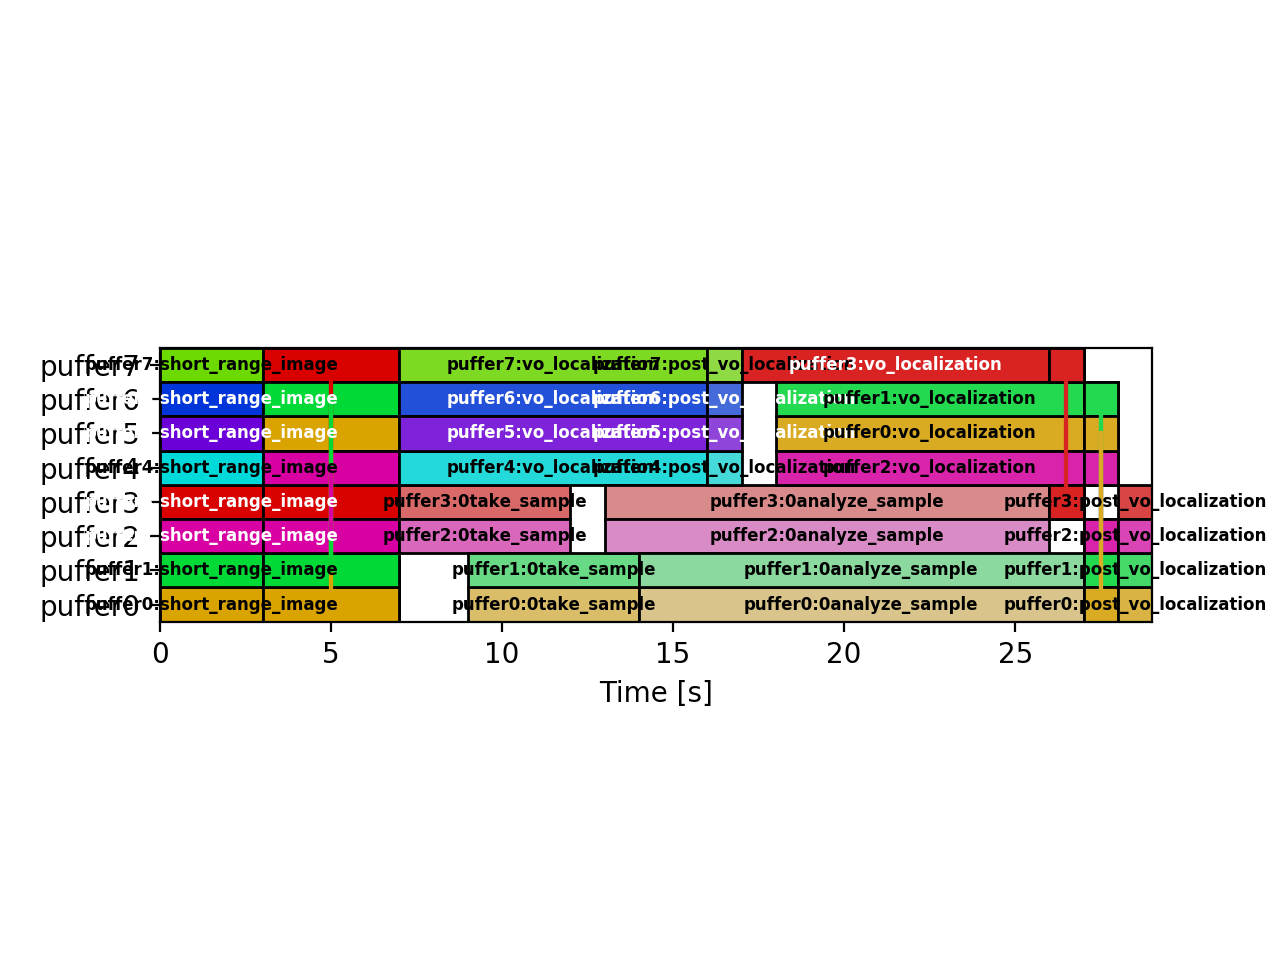

<IPython.core.display.Javascript object>


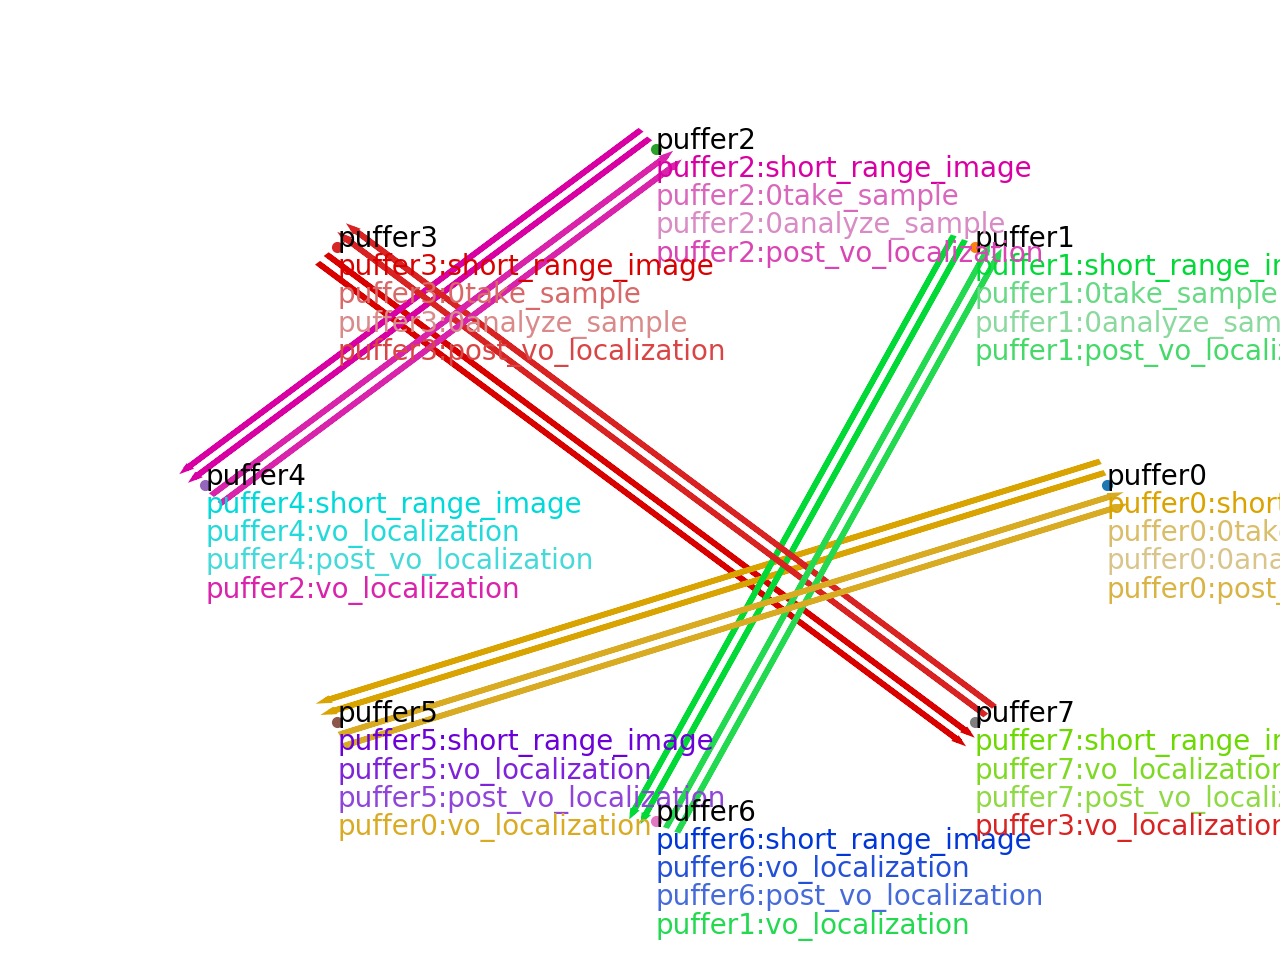

Samples:
 - Taken: 4/4
 - Analyzed: 4/4
 - Stored: 0/4


In [7]:
demo_input = static_demo.demo_input(demo_type="node_assist", network_size='large',time_horizon=30)
JSONinput, TaskColors = static_demo.create_json_description(demo_input)
# Test with a TV solver
Scheduler = MOSAICSolver.JSONSolver(JSONinput, TimeLimit=time_limit)
Schedule = Scheduler.schedule()

# print("TV SCHEDULE:\n", Schedule)
if Schedule is not None:
    MOSAICplotter.SchedulePlotter(Schedule,TaskColors)
    MOSAICplotter.TaskAllocationPlotter(Schedule,TaskColors=TaskColors)
    _ = static_demo.evaluate_output(JSONinput, Schedule,verbose=True)
else:
    print("Problem infeasible!")


# Base Station Assist

<IPython.core.display.Javascript object>


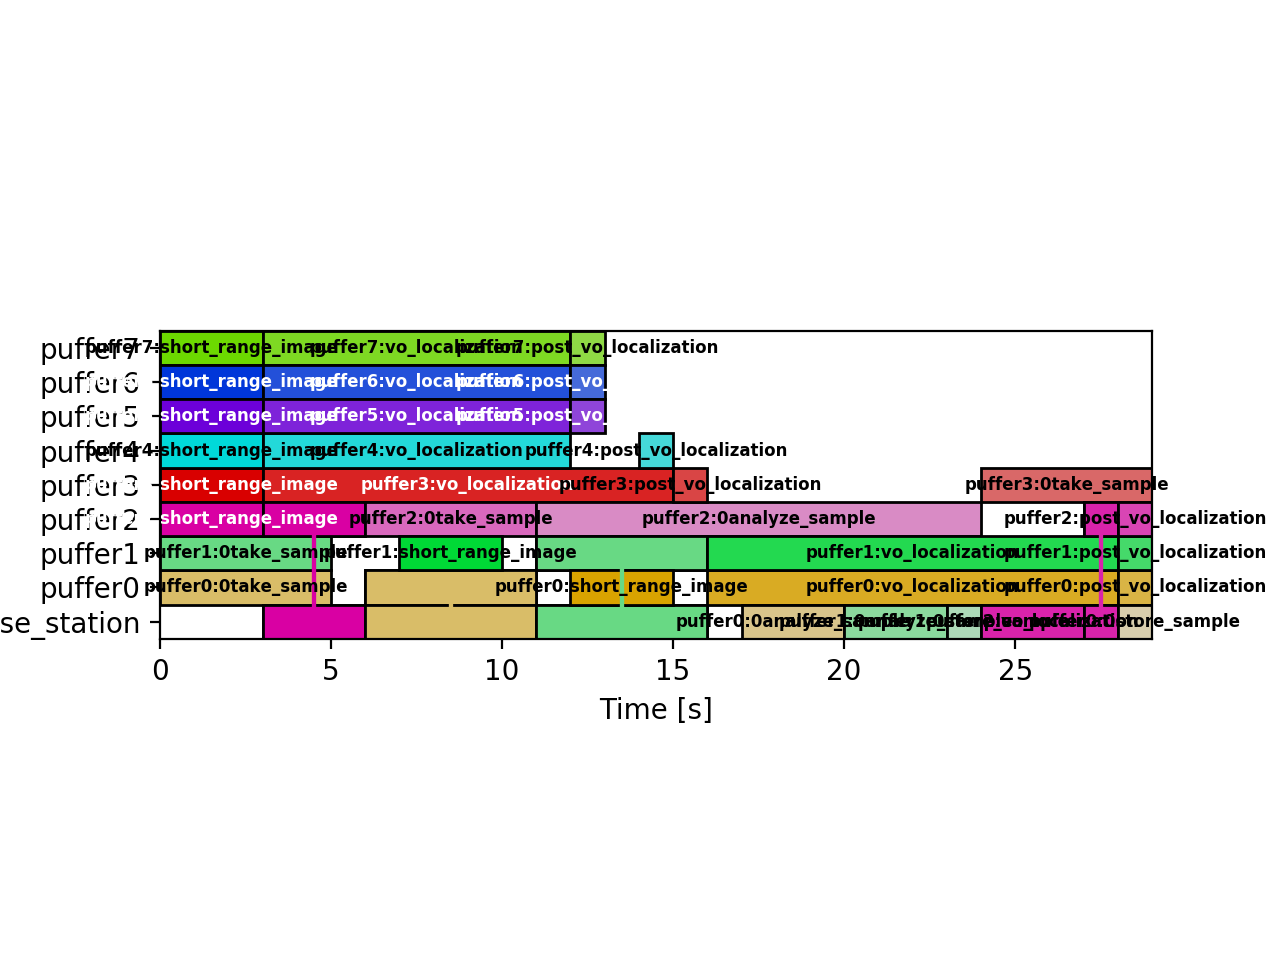

<IPython.core.display.Javascript object>


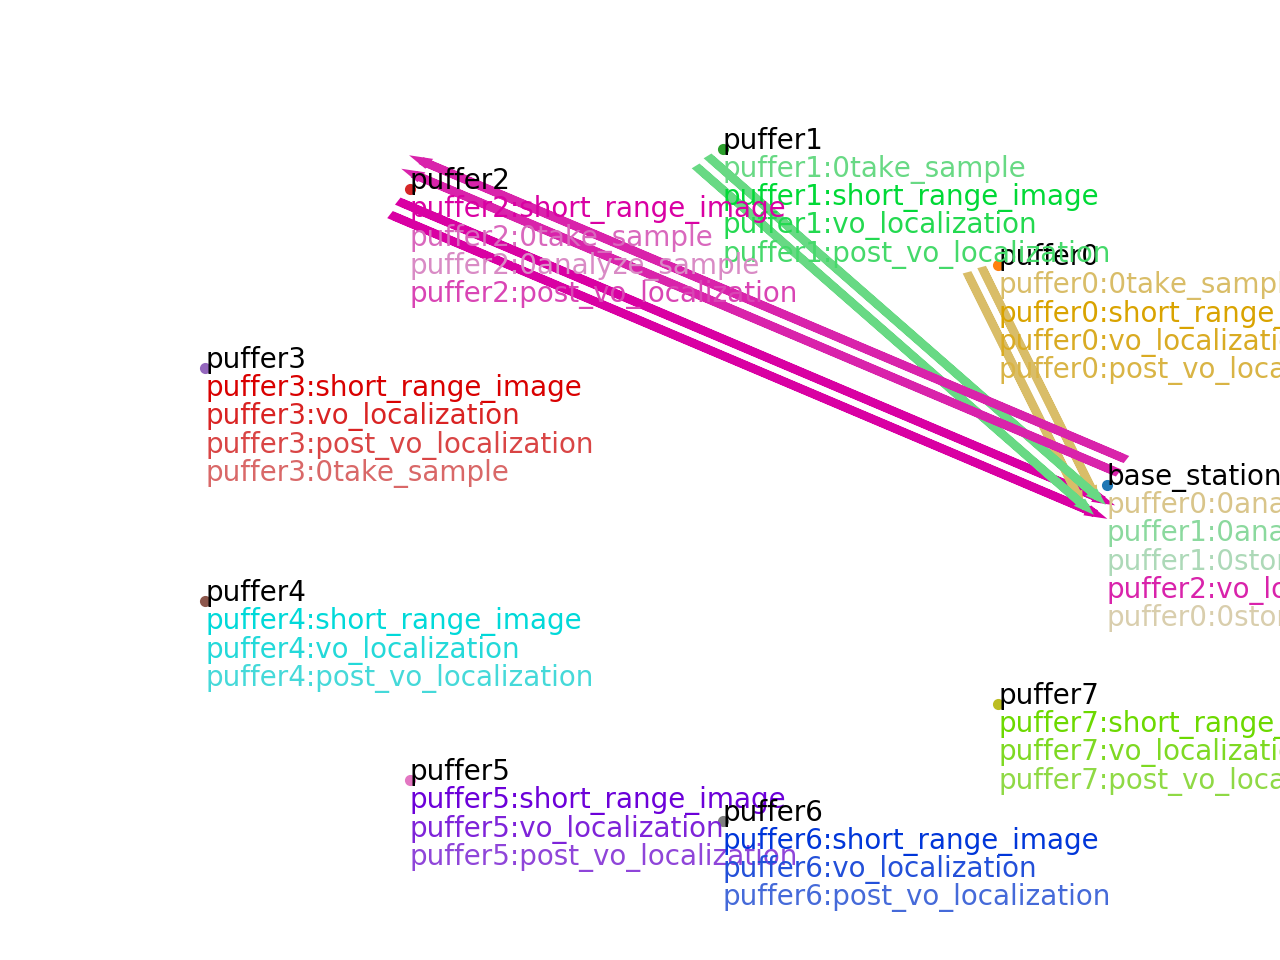

Samples:
 - Taken: 4/4
 - Analyzed: 3/4
 - Stored: 2/4


In [8]:
demo_input = static_demo.demo_input(demo_type="base_station_assist", network_size='large',time_horizon=30)
JSONinput, TaskColors = static_demo.create_json_description(demo_input)
# Test with a TV solver
Scheduler = MOSAICSolver.JSONSolver(JSONinput, TimeLimit=time_limit)
Schedule = Scheduler.schedule()

# print("TV SCHEDULE:\n", Schedule)
if Schedule is not None:
    MOSAICplotter.SchedulePlotter(Schedule,TaskColors)
    MOSAICplotter.TaskAllocationPlotter(Schedule,TaskColors=TaskColors)
    _ = static_demo.evaluate_output(JSONinput, Schedule,verbose=True)
else:
    print("Problem infeasible!")


# Assembly Line

<IPython.core.display.Javascript object>


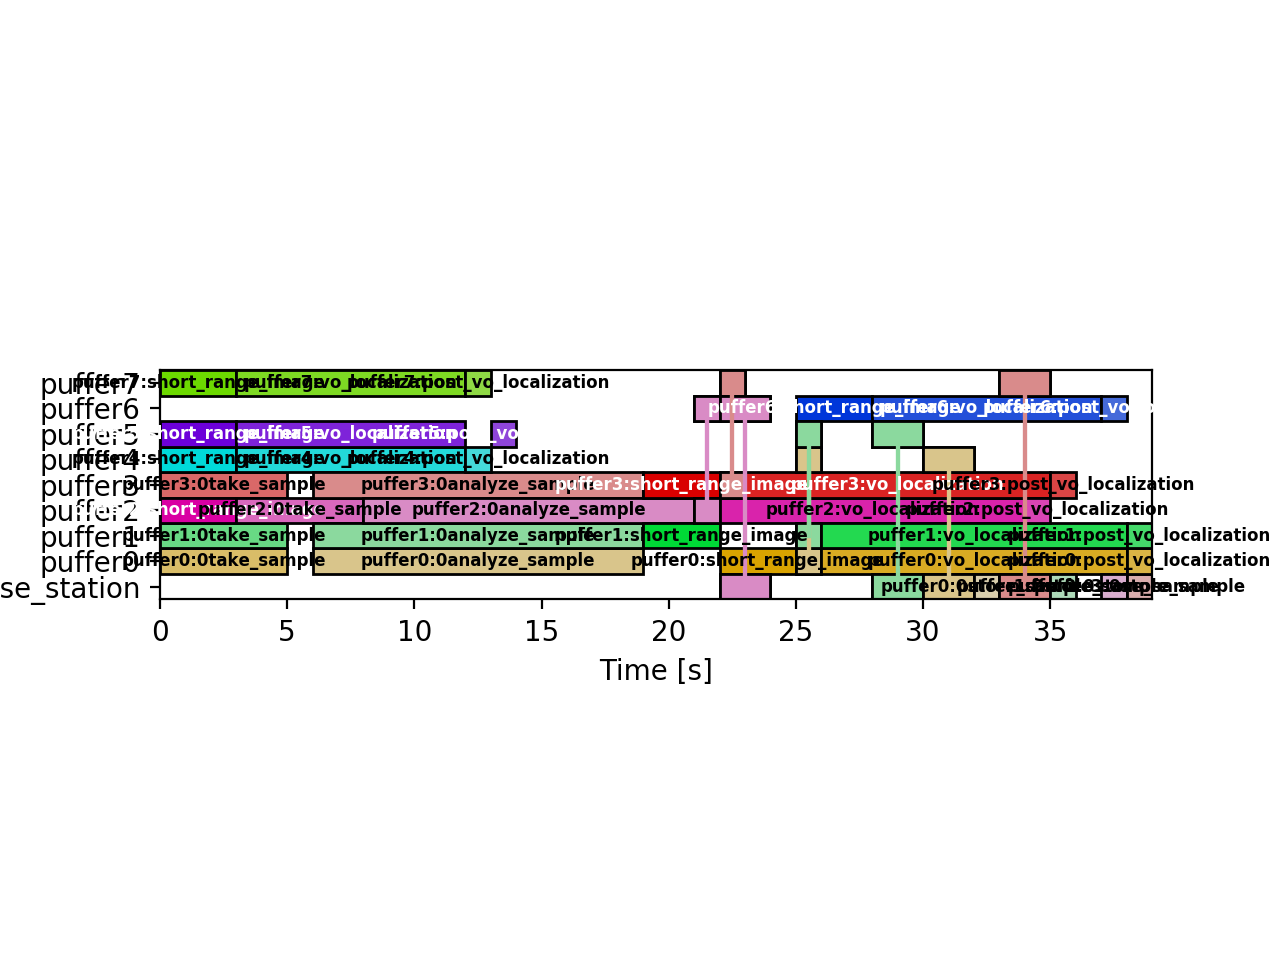

<IPython.core.display.Javascript object>


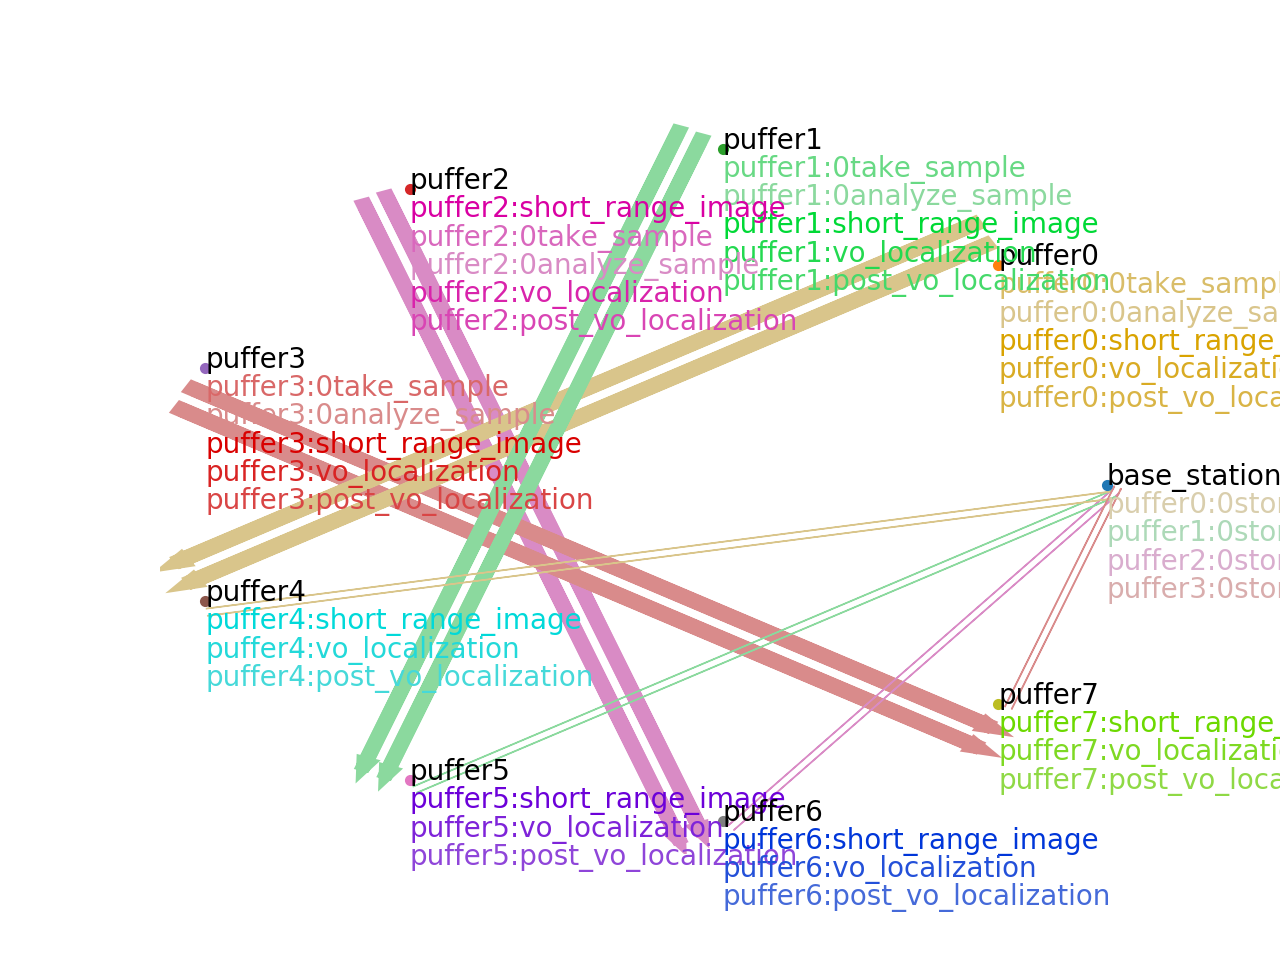

Samples:
 - Taken: 4/4
 - Analyzed: 4/4
 - Stored: 4/4


In [9]:
demo_input = static_demo.demo_input(demo_type="assembly_line", network_size='large',time_horizon=40)
JSONinput, TaskColors = static_demo.create_json_description(demo_input)
# Test with a TV solver
Scheduler = MOSAICSolver.JSONSolver(JSONinput, TimeLimit=time_limit)
Schedule = Scheduler.schedule()

# print("TV SCHEDULE:\n", Schedule)
if Schedule is not None:
    MOSAICplotter.SchedulePlotter(Schedule,TaskColors)
    MOSAICplotter.TaskAllocationPlotter(Schedule,TaskColors=TaskColors)
    _ = static_demo.evaluate_output(JSONinput, Schedule,verbose=True)
else:
    print("Problem infeasible!")


## Copyright

Copyright 2019 by California Institute of Technology.  ALL RIGHTS RESERVED.
United  States  Government  sponsorship  acknowledged.   Any commercial use
must   be  negotiated  with  the  Office  of  Technology  Transfer  at  the
California Institute of Technology.

This software may be subject to  U.S. export control laws  and regulations.
By accepting this document,  the user agrees to comply  with all applicable
U.S. export laws and regulations.  User  has the responsibility  to  obtain
export  licenses,  or  other  export  authority  as may be required  before
exporting  such  information  to  foreign  countries or providing access to
foreign persons.

This  software  is a copy  and  may not be current.  The latest  version is
maintained by and may be obtained from the Mobility  and  Robotics  Sytstem
Section (347) at the Jet  Propulsion  Laboratory.   Suggestions and patches
are welcome and should be sent to the software's maintainer.